# 6. Color Image Processing

## 6.3 Pseudocolor Image Processing

### 6.3.2 Intensity to Color Transformations

### Example 6.6: Color coding of multispectral images.

Figures 6.27(a) through (d) show four spectral satellite images of Washington D.C.. The first three images are in the visible red, green, and blue, and the fourth is in the near infrared.

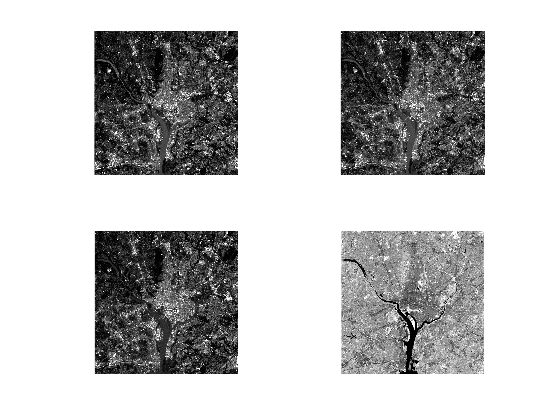

In [27]:
fb = imread('Fig0627(a).tif');
fg = imread('Fig0627(b).tif');
fr = imread('Fig0627(c).tif');
fir = imread('Fig0627(d).tif');

subplot(221), imshow(fb);
subplot(222), imshow(fg);
subplot(223), imshow(fr);
subplot(224), imshow(fir);

The next image is the full-color image obtained by combining the first three images into an RGB image, full-color images of dense areas are difficult to interpret.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 337)



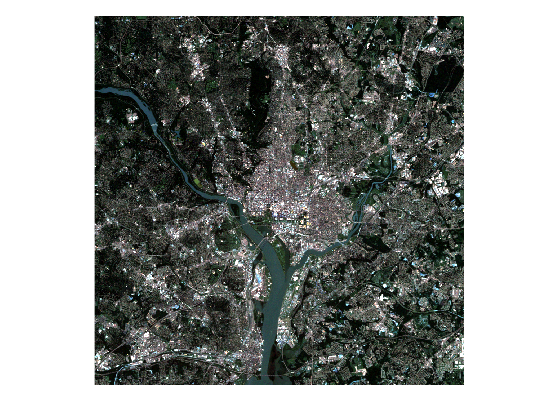

In [30]:
rgb = cat(3, fr, fg, fb);
figure, imshow(rgb);

The next image was formed by replacing the red component of the previous figure with the near-infrared image. This band is strongly responsive to the biomass components of a scene. This image shows quite clearly the difference between biomass (in red) and the human-made features in the scene, composed primarily of concrete and asphalt, which appear bluish in the image.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 337)



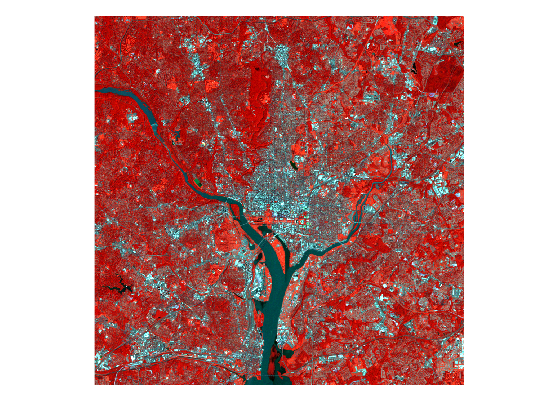

In [31]:
irgb = cat(3, fir, fg, fb);
figure, imshow(irgb);

## 6.5 Color Transformations

A full-color image in Fig. 6.30 shows a high-resolution color image of a bowl of strawberries and a cup of coffee.

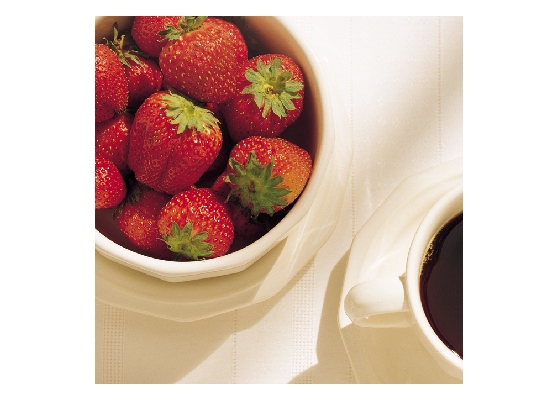

In [32]:
f = imread('Fig0630.tif');
imshow(f);

RGB color-space components

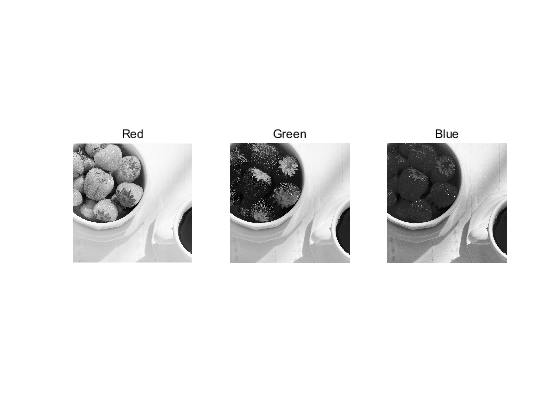

In [51]:
r = f(:, :, 1);
g = f(:, :, 2);
b = f(:, :, 3);

figure
subplot(131), imshow(r), title('Red');
subplot(132), imshow(g), title('Green');
subplot(133), imshow(b), title('Blue');

CMY color-space components

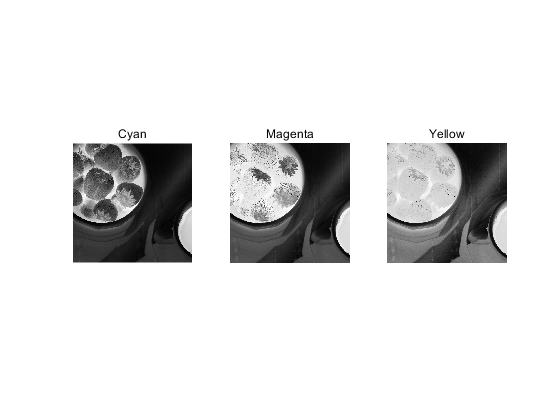

In [50]:
c = 255 - r;
m = 255 - g;
y = 255 - b;

figure
subplot(131), imshow(c), title('Cyan');
subplot(132), imshow(m), title('Magenta');
subplot(133), imshow(y), title('Yellow');

HSI color-image components

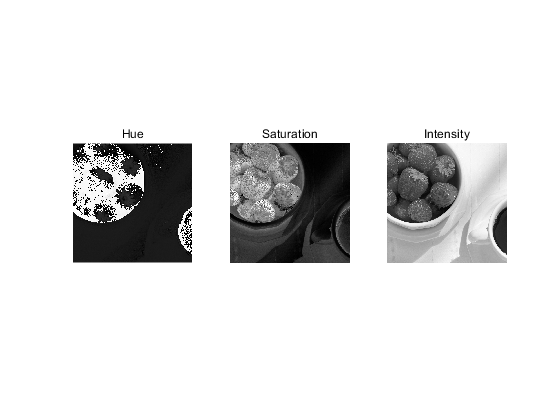

In [46]:
hsi = rgb2hsi(f);
h = hsi(:, :, 1);
s = hsi(:, :, 2);
i = hsi(:, :, 3);

figure
subplot(131), imshow(h), title('Hue');
subplot(132), imshow(s), title('Saturation');
subplot(133), imshow(i), title('Intensity');

### 6.5.2 Color Complements

The original image is a full-color image from Fig. 6.30.

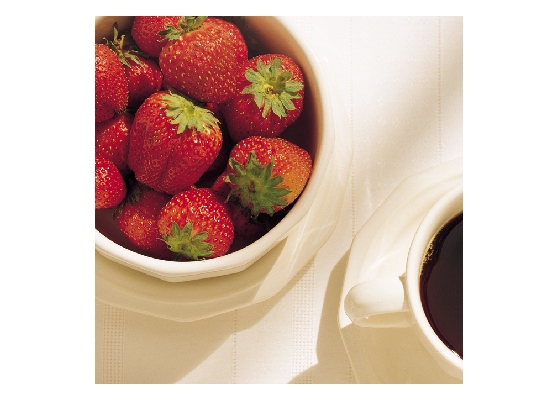

In [2]:
f = imread('Fig0630.tif');
imshow(f);

The next image is the color complement of Fig. 6.30. The RGB transformations used to compute the complement are as follows:

For images in type `uint8`, $g = 255 - f$, where $f$ is the original image, $g$ is its complement.

For images in type `single` or `double`, $g = 1 - f$.

When the original image is black, the complement is white, and so on.

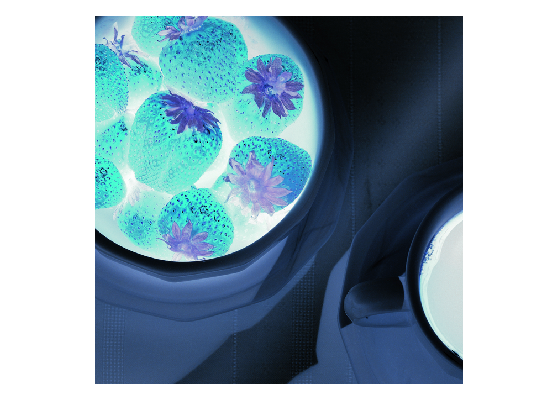

In [3]:
g = 255 - f;
figure, imshow(g);

The image below is the complementary color of HSI components, using a custom function `hsicomp`, which has the syntax:

**comp = hsicomp(hsi)**

Note that the saturation component of the input image is unaltered; it is responsible for the visual differences between the previous image and the image below.

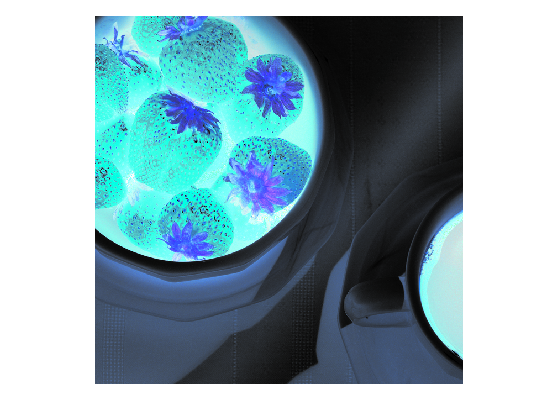

In [5]:
hsi = rgb2hsi(f);
comp = hsicomp(hsi);
h = hsi2rgb(comp);
figure, imshow(h);

## 6.7 Image Segmentation Based on Color

Segmentation is a process that partitions an image into regions.

### 6.7.3 Color Edge Detection

Figs. 6.45(a) to (c) are three components of an RGB image.

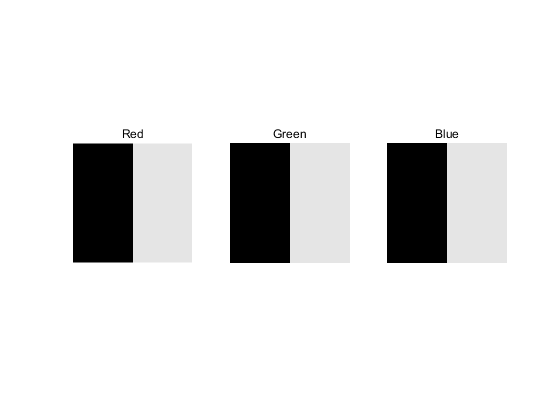

In [2]:
r1 = imread('Fig0645(a).tif');
g1 = imread('Fig0645(b).tif');
b1 = imread('Fig0645(c).tif');
subplot(131), imshow(r1), title('Red');
subplot(132), imshow(g1), title('Green');
subplot(133), imshow(b1), title('Blue');

The image below is the result of adding the three components.

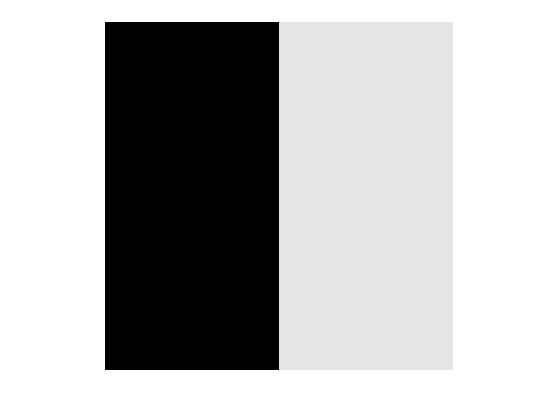

In [3]:
rgb1 = cat(3, r1, g1, b1);
figure, imshow(rgb1);

Similarly, Figs. 6.45(e) to (g) are three components of another image.

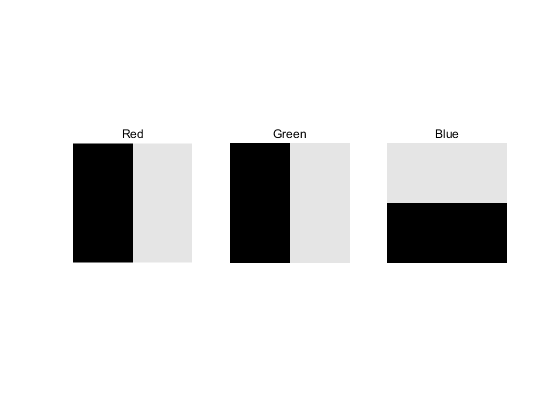

In [4]:
r2 = imread('Fig0645(e).tif');
g2 = imread('Fig0645(f).tif');
b2 = imread('Fig0645(g).tif');
subplot(131), imshow(r2), title('Red');
subplot(132), imshow(g2), title('Green');
subplot(133), imshow(b2), title('Blue');

Add the three image, we can get the following image.

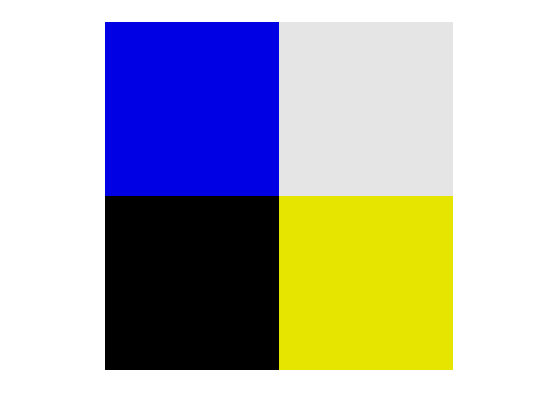

In [5]:
rgb2 = cat(3, r2, g2, b2);
figure, imshow(rgb2);

## Example 6.16: Edge detection in vector space

### Function `colorgrad`

Function `colorgrad` implements the color gradient for RGB images, which has the syntax:

**[VG, A, PPG] = colorgrad(f, T)**

where $f$ is an RGB image, $T$ is an optional threshold in the range $[0,1]$ (the default is 0); $VG$ is the RGB vector gradient; $A$ is the angle image in radians; and $PPG$ is a gradient image formed by summing the 2-D gradient images of the individual color planes.

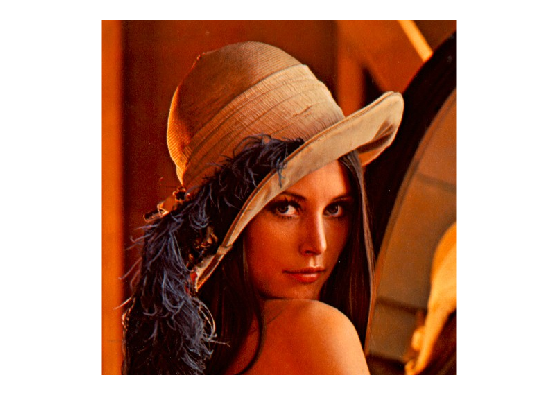

In [18]:
f = imread('Fig0646(a).tif');
imshow(f);

The image below is the gradient of the image in Fig. 6.46(a).

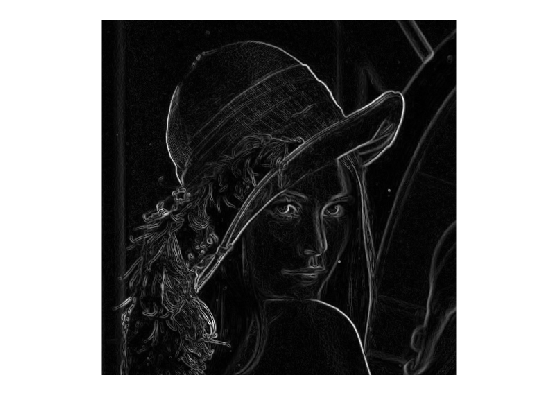

In [19]:
[VG, A, PPG] = colorgrad(f);
figure, imshow(VG, []);

The image below shows the result obtained by computing the gradient of each RGB component image and forming a composite gradient image by adding the corresponding values of the three component images at each coordinate $(x,y)$.

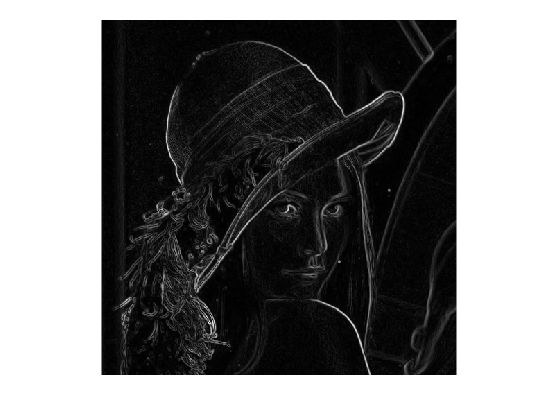

In [20]:
figure, imshow(PPG);

The edge detail of the vector gradient image is more complete than the detail in the individual-plane gradient image; for example, see the detail around the subject's right eye.

The next image shows the difference between the two gradient images at each point $(x, y)$.

It is important to note that both approaches yielded reasonable results.

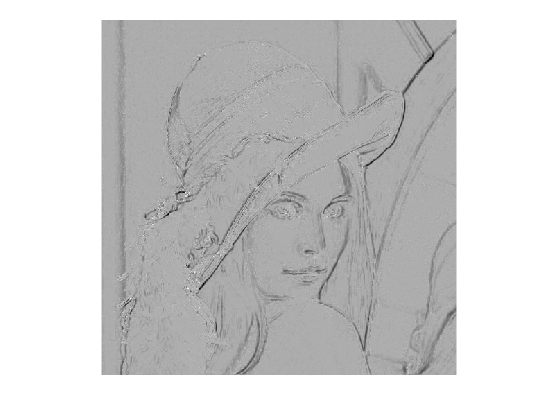

In [21]:
figure, imshow(imsubtract(PPG, VG), []);

## 6.8 Noise in Color Images

### Example 6.17: Illustration of the effects of converting noisy RGB images to HSI.

Figures 6.48(a) through (c) show the three color planes for an RGB image corrupted by Gaussian noise.

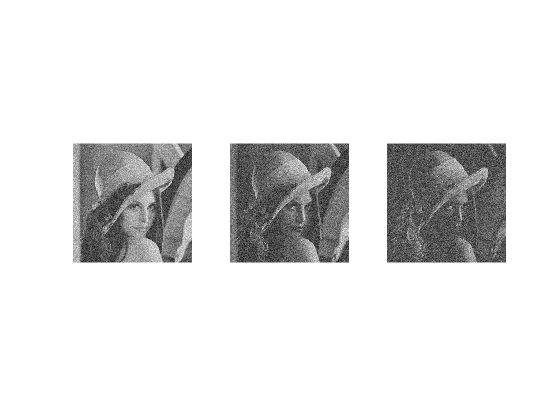

In [28]:
r = imread('Fig0648(a).tif');
g = imread('Fig0648(b).tif');
b = imread('Fig0648(c).tif');
subplot(131), imshow(r);
subplot(132), imshow(g);
subplot(133), imshow(b);

The next image is the composite RGB image. Note that fine grain noise such as this tends to be less visually noticeable in a color image than it is in a monochrome image.

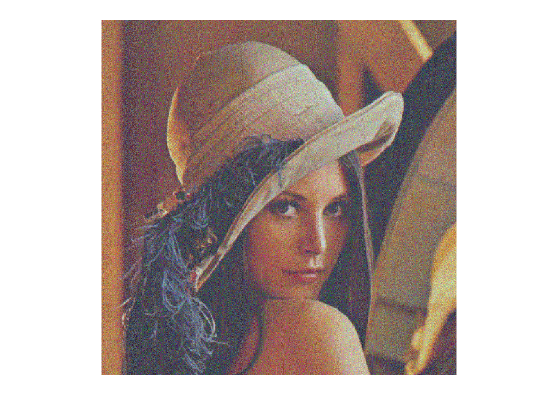

In [29]:
f = cat(3, r, g, b);
figure, imshow(f);

The three images below show the result of converting the RGB image to HSI. Compare these results with the HSI components of the original image and note how significantly degraded the hue and saturation components of the noisy image are.

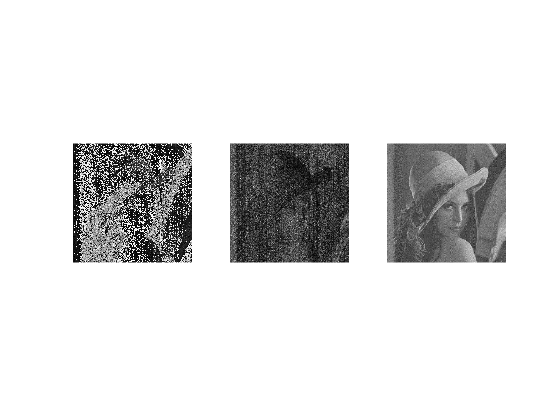

In [30]:
hsi = rgb2hsi(f);
h = hsi(:, :, 1);
s = hsi(:, :, 2);
i = hsi(:, :, 3);
figure
subplot(131), imshow(h);
subplot(132), imshow(s);
subplot(133), imshow(i);

In case when, say, only one RGB channel is affected by noise, conversion to HSI spreads the noise to all HSI component images.

Figure 6.50(a) shows an RGB image whose green image is corrupted by salt-and-pepper noise, in which the probability of either salt or pepper is 0.05.

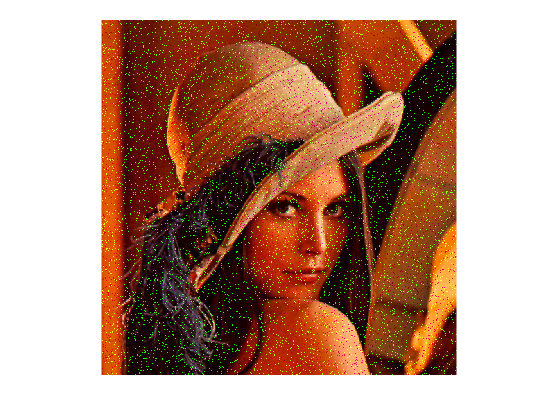

In [31]:
f = imread('Fig0650(a).tif');
imshow(f);

The HSI component images below show clearly how the noise spread from the green RGB channel to all the HSI components.

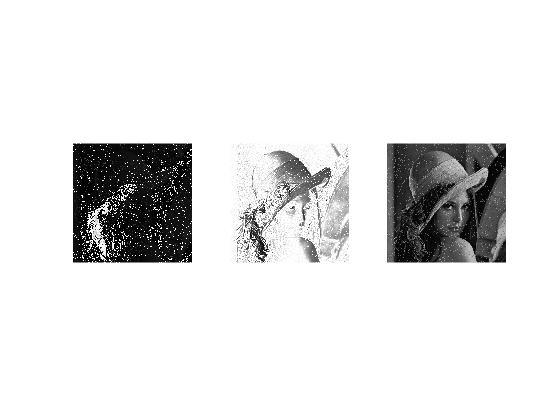

In [33]:
hsi = rgb2hsi(f);
h = hsi(:, :, 1);
s = hsi(:, :, 2);
i = hsi(:, :, 3);
figure
subplot(131), imshow(h);
subplot(132), imshow(s);
subplot(133), imshow(i);